In [42]:
import re
text = """<p style="height: 0px; opacity: 0; display: none;">
			大幅度看分地方地方
		</p>"""
reg = re.compile(r'none;">\n\t{1,10}(\D{1,60})\n\t{1,10}</p>')
text2 = re.findall(reg,text)
print(text2[0])

大幅度看分地方地方


In [6]:
a = [
    ['sds', 'dsd', 'df'],
    ['data/asset/data/weibo.json', 'data/asset/data/weibo.json', 'data/asset/data/weibo.json'],
    ['data/asset/data/weibo.json', 'data/asset/data/weibo.json', 'data/asset/data/weibo.json'],
    ['data/asset/data/weibo.json', 'data/asset/data/weibo.json', 'data/asset/data/weibo.json'],
    ['data/asset/data/weibo.json', 'data/asset/data/weibo.json', 'data/asset/data/weibo.json'],
    ['data/asset/data/weibo.json', 'data/asset/data/weibo.json', 'data/asset/data/weibo.json']
]

In [10]:
a[1][1]

'data/asset/data/weibo.json'

In [5]:
class LocaDiv(object):    
    def __init__(self,loc_all):
        self.loc_all = loc_all
     
    def lat_all(self):    
        lat_sw = float(self.loc_all.split(',')[0])
        lat_ne = float(self.loc_all.split(',')[2])
        lat_list = [str(lat_ne)]
        while lat_ne-lat_sw >= 0:
            m = lat_ne - 0.03
            lat_ne = lat_ne - 0.03
            lat_list.append('%.2f' % m)
        return sorted(lat_list)
    
    def lng_all(self):
        lng_sw = float(self.loc_all.split(',')[1])
        lng_ne = float(self.loc_all.split(',')[3])
        lng_list = [str(lng_ne)]
        while lng_ne-lng_sw >= 0:
            m = lng_ne - 0.03
            lng_ne = lng_ne - 0.03
            lng_list.append('%.2f' % m)
        return sorted(lng_list)
    
    def ls_com(self):
        l1 = self.lat_all()
        l2 = self.lng_all()
        ab_list = []
        for i in range(0,len(l1)):
            a = str(l1[i])
            for i2 in range(0,len(l2)):
                b = str(l2[i2])
                ab = a+','+b
                ab_list.append(ab)
        return ab_list
    
    def ls_row(self):
        l1 = self.lat_all()
        l2 = self.lng_all()        
        ls_com_v = self.ls_com()
        ls = []
        for n in range(0,len(l1)-1):
            for i in range(len(l2)*n,len(l2)*(n+1)-1):
                a = ls_com_v[i]
                b = ls_com_v[i+len(l2)+1]
                ab = a+','+b
                ls.append(ab)
        return ls    
    
if __name__ == '__main__':  
    loc = LocaDiv('39.79,116.13,40.07,116.62')
    print len(loc.ls_row())

170


In [11]:
import pandas as pd

df = pd.DataFrame({'col_a':['ast1','ast2','ast3'],'col_b':[['text1','text2','text3'],['mext1','mext2','mext3'],['cext1','cext2']]})
df

,col_a,col_b
0,ast1,"[text1, text2, text3]"
1,ast2,"[mext1, mext2, mext3]"
2,ast3,"[cext1, cext2]"


In [24]:
from itertools import combinations
df.groupby('col_a')['col_b'].apply(lambda x: pd.Series(list(combinations(x.iloc[0], 2)))).reset_index(level = 0)

,col_a,col_b
0,ast1,"(text1, text2)"
1,ast1,"(text1, text3)"
2,ast1,"(text2, text3)"
0,ast2,"(mext1, mext2)"
1,ast2,"(mext1, mext3)"
2,ast2,"(mext2, mext3)"
0,ast3,"(cext1, cext2)"


In [27]:
from itertools import combinations
df.groupby('col_a')['col_b'].apply(lambda x: pd.Series(list(combinations(x.iloc[0], 2)))).reset_index()

,col_a,level_1,col_b
0,ast1,0,"(text1, text2)"
1,ast1,1,"(text1, text3)"
2,ast1,2,"(text2, text3)"
3,ast2,0,"(mext1, mext2)"
4,ast2,1,"(mext1, mext3)"
5,ast2,2,"(mext2, mext3)"
6,ast3,0,"(cext1, cext2)"


In [16]:
import itertools
series = df["col_b"].apply(lambda x: pd.Series(list(itertools.combinations(x,2)))).stack()

series.name = "col_b_1"
result = df.merge(pd.DataFrame(series).reset_index(),
    left_index=True,
    right_on="level_0")[["col_a","col_b_1"]]
result

,col_a,col_b_1
0,ast1,"(text1, text2)"
1,ast1,"(text1, text3)"
2,ast1,"(text2, text3)"
3,ast2,"(mext1, mext2)"
4,ast2,"(mext1, mext3)"
5,ast2,"(mext2, mext3)"
6,ast3,"(cext1, cext2)"


In [12]:
import itertools
series = df["col_b"].apply(lambda x: \
    pd.Series(list(itertools.combinations(x,2)))).stack()

In [13]:
series.name = "col_b_1"
result = df.merge(pd.DataFrame(series).reset_index(),
    left_index=True,
    right_on="level_0")[["col_a","col_b_1"]]

In [14]:
result

,col_a,col_b_1
0,ast1,"(text1, text2)"
1,ast1,"(text1, text3)"
2,ast1,"(text2, text3)"
3,ast2,"(mext1, mext2)"
4,ast2,"(mext1, mext3)"
5,ast2,"(mext2, mext3)"
6,ast3,"(cext1, cext2)"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 
                    'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, 
                   columns=['a', 'b', 'c'])
df4.head()

C:\Program Files (x86)\Anaconda2\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,a,b,c
0,-1.118029,0.611783,-1.183978
1,0.932117,0.958711,-1.789937
2,0.420203,-0.624701,-0.046662
3,0.734571,-0.065408,0.100862
4,-0.603107,2.195281,0.141260


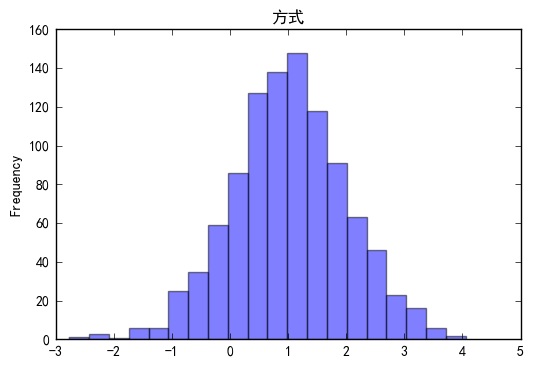

In [2]:
df4['a'].plot.hist(alpha=0.5,bins=20)
plt.title(u'方式')

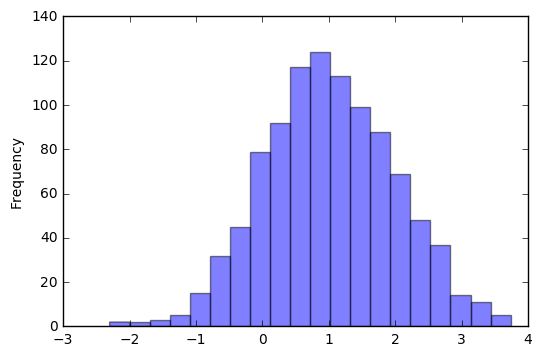

In [12]:
df4['a'].plot.hist(alpha=0.5,bins=20,aa=True)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df3 = pd.DataFrame({'a': [1,2,3,4,5,6,7,6,3,4,5,6,6]} ,

                   columns=['a'])
df3.head()

C:\Program Files (x86)\Anaconda2\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,a
0,1
1,2
2,3
3,4
4,5


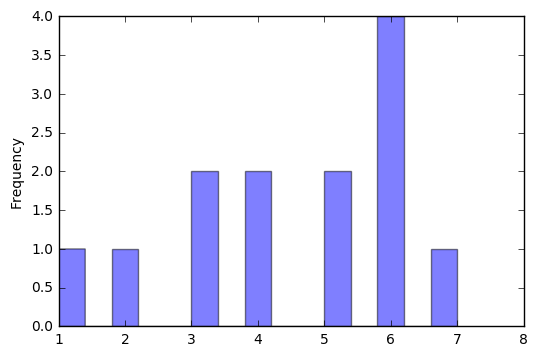

In [55]:
df3['a'].plot.hist(alpha=0.5,bins=15)

# 增加子图3中方法

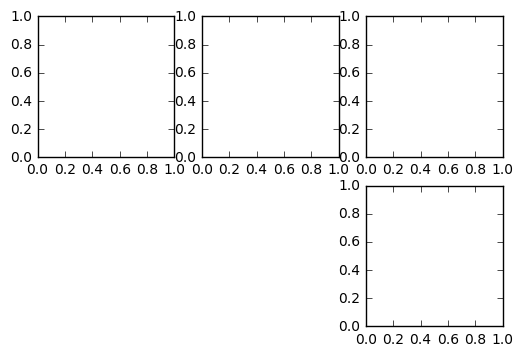

In [19]:
plt.subplot(2,3,1)
plt.subplot(2,3,2)
plt.subplot(2,3,3)
plt.subplot(2,3,6)

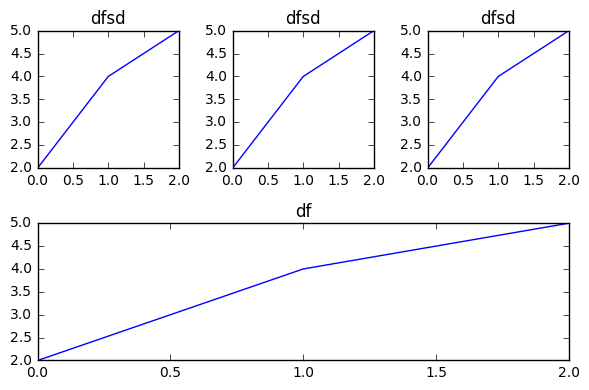

In [15]:
plt.subplot2grid((2,3),(0,0))
plt.plot([2,4,5])
plt.title('dfsd')
plt.subplot2grid((2,3),(0,1))
plt.plot([2,4,5])
plt.title('dfsd')
plt.subplot2grid((2,3),(0,2))
plt.plot([2,4,5])
plt.title('dfsd')
plt.subplot2grid((2,3),(1,0),colspan=3)
plt.plot([2,4,5])
plt.title(u'df')
plt.tight_layout()

In [4]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = (np.random.normal(size=(100, 3)) *
        np.array([[1, 1, 1]]) +
        np.array([[31.31, 120.63, 1]])).tolist()

map_osm = folium.Map(location=[31.31,120.63],
                     tiles='Stamen Toner',
                     zoom_start=7)

HeatMap(data).add_to(map_osm)


In [5]:
map_osm.save('./index.html')

In [3]:
# import numpy as np
# import os
# import folium
# data = (np.random.normal(size=(100, 3)) *
#         np.array([[1, 1, 1]]) +
#         np.array([[48, 5, 1]])).tolist()

# from folium.plugins import HeatMap

# m = folium.Map([48., 5.], tiles='stamentoner', zoom_start=6)

# HeatMap(data).add_to(m)

# m.save('Heatmap.html')

# m

In [ ]:
import bokeh
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

In [ ]:
import bokeh
bokeh.sampledata.download()  #将sample解析到本机

Using data directory: C:\Users\Administrator\.bokeh\data
Downloading: CGM.csv (1589982 bytes)
     65536 [  4.12%]

In [ ]:
import pandas as pd
df=pd.DataFrame({'time':['08:35','09:35','09:45','10:10'],
                 'from':['SHH','SZH','WXH','ZJH'],
                 'to':['NJH','NJH','NJH','NJH']})
df

In [ ]:
df = df[df['time'] == current_time]

for row in df.itertuples():
    print("Time is reached. train from {} to {}".format(row[1], row[3]))